# Numpy, Matplotlib and Sklearn Tutorial

We often use numpy to handle high dimensional arrays.

Let's try the basic operation of numpy:

In [1]:
import numpy as np

a = np.array([[1,2,3], [2,3,4]])
print(a.ndim, a.shape, a.size, a.dtype, type(a))

b = np.zeros((3,4))
c = np.ones((3,4))
d = np.random.randn(2,3)
e = np.array([[1,2], [2,3], [3,4]])
f = b*2 - c*3
g = 2*c*f
h = np.dot(a,e)
i = d.mean()
j = d.max(axis=1)
k = a[-1][:2]

# You can print from a to k for details

2 (2, 3) 6 int64 <class 'numpy.ndarray'>


matplotlib.pyplot provides very useful apis for drawing graphs.

Let's try the basic operation of matplotlib.pyplot:

In [2]:
import matplotlib.pyplot as plt

x = np.arange(2, 10, 0.2)

plt.plot(x, x**1.5*.5, 'r-', x, np.log(x)*5, 'g--', x, x, 'b.')
plt.show()

<Figure size 640x480 with 1 Axes>

If you want to print them in different graphs, try this:

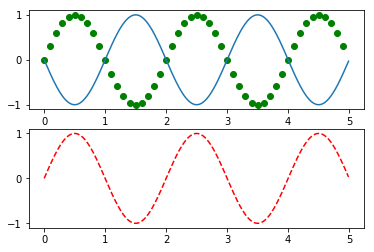

In [3]:
def f(x):
    return np.sin(np.pi*x)

x1 = np.arange(0, 5, 0.1)
x2 = np.arange(0, 5, 0.01)

plt.subplot(211)
plt.plot(x1, f(x1), 'go', x2, f(x2-1))

plt.subplot(212)
plt.plot(x2, f(x2), 'r--')
plt.show()

How about printing images?

Let's try to print a image whose pixels gradually change:

Different pixel values represent different gray levels.

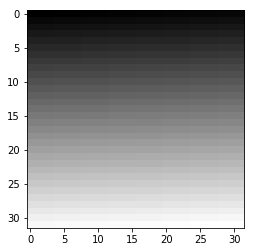

In [4]:
img = np.arange(0, 1, 1/32/32) # define an 1D array with 32x32 elements gradually increasing
img = img.reshape(32, 32) # reshape it into 32x32 array, the array represents a 32x32 image,
                          # each element represents the corresponding pixel of the image
plt.imshow(img, cmap='gray')
plt.show()

Based on numpy, Scikit-learn (sklearn) provides a lot of tools for machine learning.It is a very powerful machine learning library.

Then, let's use it for mnist classification:

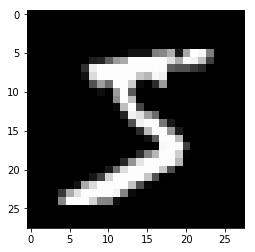

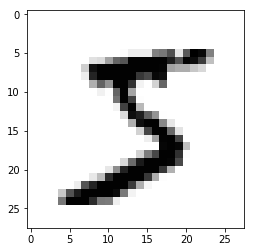

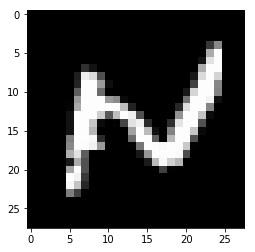

In [5]:
from sklearn.datasets import fetch_openml

# download and load mnist data from https://www.openml.org/d/554
# for this tutorial, the data have been downloaded already in './scikit_learn_data'
X, Y = fetch_openml('mnist_784', version=1, data_home='./scikit_learn_data', return_X_y=True)

# make the value of pixels from [0, 255] to [0, 1] for further process
X = X / 255.

# print the first image of the dataset
img1 = X[0].reshape(28, 28)
plt.imshow(img1, cmap='gray')
plt.show()

# print the images after simple transformation
img2 = 1 - img1
plt.imshow(img2, cmap='gray')
plt.show()

img3 = img1.transpose()
plt.imshow(img3, cmap='gray')
plt.show()

In [6]:
# split data to train and test (for faster calculation, just use 1/10 data)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)

#### Q1:
Please use the logistic regression(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [7]:
print(X_train.shape,Y_train.shape[0],type(Y_train))
a=np.array([1,2,3])
b=np.array([2,1,3])
print(np.sum(a==b))

(6000, 784) 6000 <class 'numpy.ndarray'>
1


In [8]:
# TODO:use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train, Y_train)
Y_predict_train=classifier_logistic.predict(X_train)
Y_predict_test=classifier_logistic.predict(X_test)

train_accuracy=np.sum(Y_train == Y_predict_train)/Y_train.shape[0]
test_accuracy=np.sum(Y_test == Y_predict_test)/Y_test.shape[0]

print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

/DB/rhome/gjliu/anaconda2/envs/py36pt1.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/DB/rhome/gjliu/anaconda2/envs/py36pt1.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 95.43%
Testing accuracy: 88.40%


#### Q2:
Please use the naive bayes(Bernoulli, default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [9]:
# TODO:use naive bayes
from sklearn.naive_bayes import BernoulliNB

classifier_Bernoulli = BernoulliNB()
classifier_Bernoulli.fit(X_train, Y_train)
Y_predict_train=classifier_Bernoulli.predict(X_train)
Y_predict_test=classifier_Bernoulli.predict(X_test)

train_accuracy=np.sum(Y_train == Y_predict_train)/Y_train.shape[0]
test_accuracy=np.sum(Y_test == Y_predict_test)/Y_test.shape[0]

print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 81.87%
Testing accuracy: 80.60%


#### Q3:
Please use the support vector machine(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [10]:
# TODO:use support vector machine
from sklearn.svm import LinearSVC

classifier_LinearSVC = LinearSVC()
classifier_LinearSVC.fit(X_train, Y_train)
Y_predict_train=classifier_LinearSVC.predict(X_train)
Y_predict_test=classifier_LinearSVC.predict(X_test)

train_accuracy=np.sum(Y_train == Y_predict_train)/Y_train.shape[0]
test_accuracy=np.sum(Y_test == Y_predict_test)/Y_test.shape[0]

print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 97.93%
Testing accuracy: 85.20%


/DB/rhome/gjliu/anaconda2/envs/py36pt1.0/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Q4:
Please adjust the parameters of SVM to increase the testing accuracy, and print the training accuracy and test accuracy.

C: 0.01 Train_ac 90.23%  Test_ac 88.90%
C: 0.02 Train_ac 91.52%  Test_ac 89.30%
C: 0.03 Train_ac 92.02%  Test_ac 89.00%
C: 0.04 Train_ac 92.40%  Test_ac 89.00%
C: 0.05 Train_ac 92.75%  Test_ac 89.20%
C: 0.06 Train_ac 92.97%  Test_ac 89.10%
C: 0.07 Train_ac 93.17%  Test_ac 89.30%
C: 0.08 Train_ac 93.33%  Test_ac 89.20%
C: 0.09 Train_ac 93.38%  Test_ac 89.10%
C: 0.10 Train_ac 93.47%  Test_ac 89.10%
C: 0.11 Train_ac 93.57%  Test_ac 89.10%
C: 0.12 Train_ac 93.60%  Test_ac 88.90%
C: 0.13 Train_ac 93.77%  Test_ac 88.90%
C: 0.14 Train_ac 93.88%  Test_ac 89.10%
C: 0.15 Train_ac 93.98%  Test_ac 89.10%
C: 0.16 Train_ac 94.08%  Test_ac 88.80%
C: 0.17 Train_ac 94.18%  Test_ac 88.30%
C: 0.18 Train_ac 94.27%  Test_ac 88.30%
C: 0.19 Train_ac 94.35%  Test_ac 88.40%
C: 0.20 Train_ac 94.43%  Test_ac 88.50%
C: 0.21 Train_ac 94.48%  Test_ac 88.60%
C: 0.22 Train_ac 94.50%  Test_ac 88.60%
C: 0.23 Train_ac 94.57%  Test_ac 88.30%
C: 0.24 Train_ac 94.62%  Test_ac 88.20%
C: 0.25 Train_ac 94.65%  Test_ac 88.20%


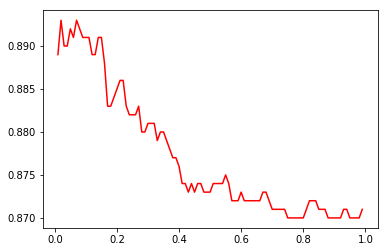

Training accuracy: 91.52%
Best Testing accuracy: 89.30%


In [14]:
# TODO:use SVM with another group of parameters
from sklearn.svm import LinearSVC

result = np.zeros((2,1))
best_testac=0;
best_trainac=0
best_C=0
for i in range(1,100,1):
    classifier_SVM = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001,
                           C=0.01*i, multi_class='ovr', fit_intercept=True, intercept_scaling=1, 
                            class_weight=None, verbose=0, random_state=None, max_iter=90000)#C=0.0001*i*(10**int(i/10))
    classifier_SVM.fit(X_train, Y_train)
    Y_predict_train=classifier_SVM.predict(X_train)
    Y_predict_test=classifier_SVM.predict(X_test)
    train_accuracy=np.sum(Y_train == Y_predict_train)/Y_train.shape[0]
    test_accuracy=np.sum(Y_test == Y_predict_test)/Y_test.shape[0]
    print('C:',"%.2f"%(0.01*i),'Train_ac %0.2f%%'% (train_accuracy*100),' ' 'Test_ac %0.2f%%'% (test_accuracy*100))
    temp = np.array([[0.01*i],[test_accuracy]])
    result = np.c_[result,temp]
    if best_testac < test_accuracy:
        best_trainac=train_accuracy
        best_testac=test_accuracy
        best_C=0.01*i

result = np.delete(result, 0, axis=1)
plt.plot(result[0,:],result[1,:],'r')
plt.show()

print('Training accuracy: %0.2f%%' % (best_trainac*100))
print('Best Testing accuracy: %0.2f%%' % (best_testac*100))